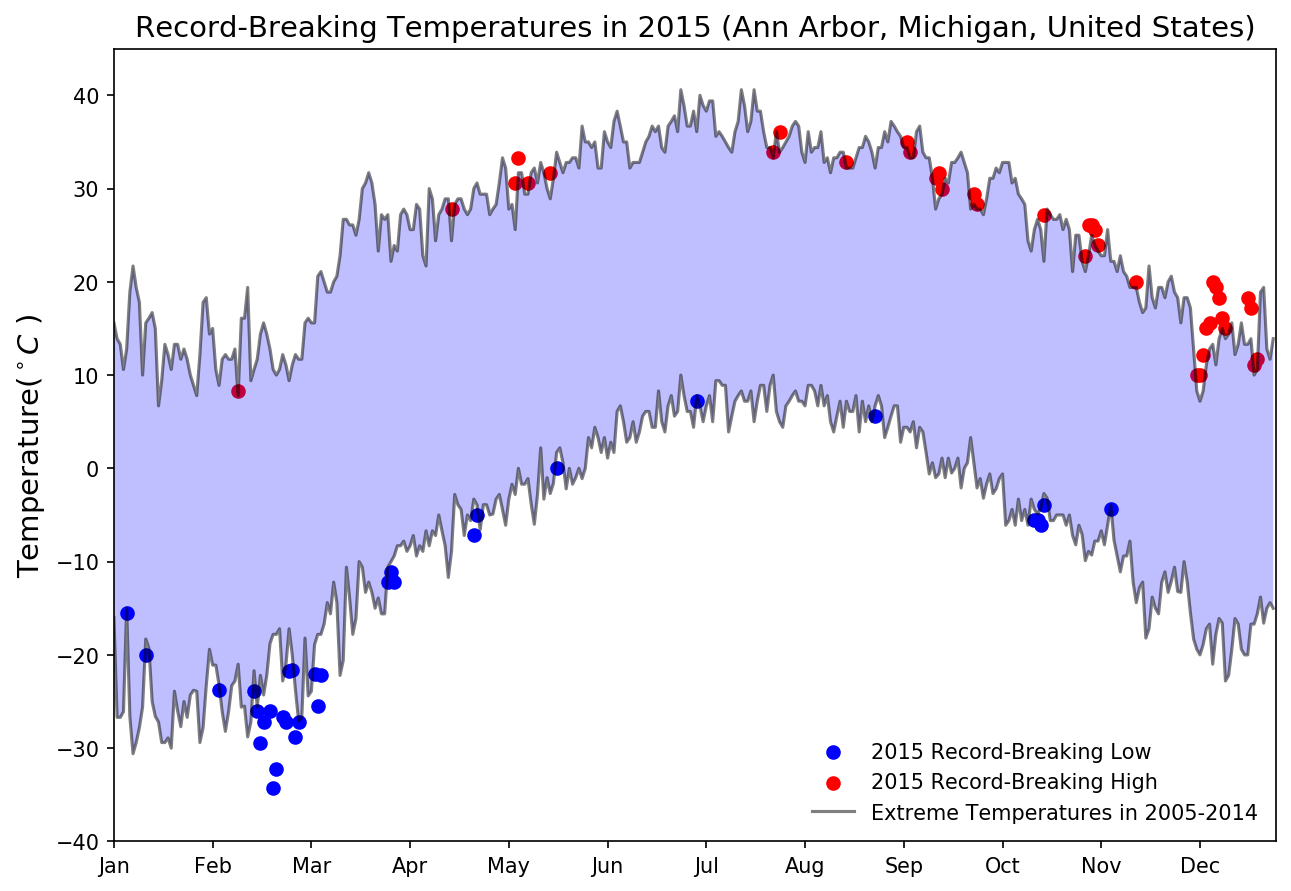

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Read data
df = pd.read_csv('weather_data.csv')


###==========================Preparing Data===============================###

# look at the 5 first rows of data to get familierized with the dataset
# Use appropriate column names
df.head()
df.rename(columns={'Data_Value':'temperature'},inplace=True)

# Convert temperature from tenths of degree C to degree C
df['temperature'] = 0.1*df['temperature']

# Converting Date column to Datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Remove leap days (i.e. February 29th) from data
def isleapday(df):
    return ((df['Date'].dt.month==2) & (df['Date'].dt.day==29))

df = df[~isleapday(df)]

# Temprature data for 2005-2014
df_5_to_14 = df[(df['Date'].dt.year>=2005) & (df['Date'].dt.year<=2014)]

# Temprature data for 2015
df_15 = df[(df['Date'].dt.year==2015)]

# Min and max temperatures for each day in the years 2005-2014
df_5_to_14_min = df_5_to_14.groupby([df_5_to_14['Date'].dt.month, df_5_to_14['Date'].dt.day])['temperature'].min()
df_5_to_14_min.index.names = ['Month', 'Day']

df_5_to_14_max = df_5_to_14.groupby([df_5_to_14['Date'].dt.month, df_5_to_14['Date'].dt.day])['temperature'].max()
df_5_to_14_max.index.names = ['Month', 'Day']   
    
# Min and max temperatures for each day for the years 2015
df_15_min = df_15.groupby([df_15['Date'].dt.month, df_15['Date'].dt.day])['temperature'].min()
df_15_min.index.names = ['Month', 'Day']

df_15_max = df_15.groupby([df_15['Date'].dt.month, df_15['Date'].dt.day])['temperature'].max()
df_15_max.index.names = ['Month', 'Day']   

# Find which of the ten years (2005-2014) record (high or low) was broken in 2015.
record_15_min = pd.DataFrame(df_15_min[df_15_min < df_5_to_14_min]) 
record_15_min = record_15_min.reindex(df_5_to_14_max.index)

record_15_max = pd.DataFrame(df_15_max[df_15_max > df_5_to_14_max]) 
record_15_max = record_15_max.reindex(df_5_to_14_max.index)

###==========================Generating Data Visualization===============================###

# Matplotlib magic function to see plots in the notebook (in case of using Jupyter Notebook)
# %matplotlib notebook 

# Specify figure size and dpi
plt.figure(figsize = (10,7), dpi=150)

# Plot time series for min and max temperatures according to 2005-2014 data
plt.plot(np.arange(len(df_5_to_14_max)), df_5_to_14_max, '-k', alpha=0.5, 
         label="Extreme Temperatures in 2005-2014")
plt.plot(np.arange(len(df_5_to_14_min)), df_5_to_14_min, '-k', alpha=0.5)

# Plot scatter plots for record-breaking highs and lows in 2015
plt.scatter(np.where(~record_15_max.temperature.isnull()), record_15_max[record_15_max.temperature.notnull()],
            c='r',label='2015 Record-Breaking High')

plt.scatter(np.where(~record_15_min.temperature.isnull()), record_15_min[record_15_min.temperature.notnull()],
            c='b',label='2015 Record-Breaking Low')

# Fill the area between the min and max temperatures according to 2005-2014 data
plt.gca().fill_between(np.arange(0,365), df_5_to_14_min, df_5_to_14_max, 
                       facecolor='blue', alpha=0.25)
# Fix axes scales
ax = plt.gca()
ax.axis([0,365,-40,45])

# Add axes labels, the figure title, and legends
plt.xticks(np.arange(0,365,31), ['Jan','Feb', 'Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
#plt.xlabel('Month',size=14)
plt.ylabel('Temperature($^\circ C$ )',size=14)

plt.title('Record-Breaking Temperatures in 2015 (Ann Arbor, Michigan, United States)',size=14)
#plt.legend(loc=4, frameon=False)

handles, labels = plt.gca().get_legend_handles_labels()
order = [2,1,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], frameon=False)

plt.show()
